# Implementation de l'Algorithme de Regression Lineaire Simple from Scratch

In [148]:
import numpy as np 
import matplotlib.pyplot as plt

## Création d'un Jeu de Données

In [151]:
np.random.seed(0) # <-- Permet de fixer pour obtenir les meme données lors d'une future utilisation
x = np.random.randn(150, 1)
y = x + np.random.randn(150, 1) / 2

In [153]:
x.shape

(150, 1)

In [155]:
y.shape

(150, 1)

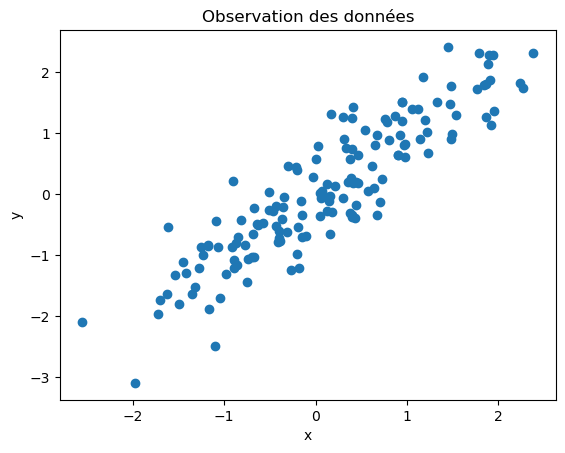

In [157]:
plt.figure()
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Observation des données")
plt.show()

In [159]:
X = np.hstack((x, np.ones((150, 1)))) # <--- Matrice données + bias
X[:4, :]

array([[1.76405235, 1.        ],
       [0.40015721, 1.        ],
       [0.97873798, 1.        ],
       [2.2408932 , 1.        ]])

In [161]:
theta = np.random.randn(2, 1) # <-- Vecteur parametre

## Definition du Modele : F = X.theta

In [164]:
def modele(X, theta):
    return X.dot(theta)

## Definition de la fonction cout 

In [167]:
def cost_function(X, theta, y):
    predition = modele(X, theta)
    erreurs = predition - y
    return erreurs.mean(axis=0) / 2

## fonction Gradient 

In [170]:
def gradient_function(X, theta, y):
    m = len(y)
    return X.T.dot(modele(X, theta) - y) / m

## Algoritme de gradient descent

In [173]:
def gradient_descent(X, theta, y, alpha = 0.01, nbr_itterations=200, precision = 0):
    history = []
    for i in range(nbr_itterations):
        history.append(cost_function(X, theta, y))
        theta_precedent = theta
        theta = theta - alpha * gradient_function(X, theta, y)
        if(0 < precision < 1):
            norm_vectuer = (theta - theta_precedent)**2
            norm = (norm_vectuer.sum(axis=0)) ** 0.5
            if(norm <= precision):
                return theta, history
    return theta, history

## Presentation du modele avant entrainement Avec le jeu des données

In [176]:
x_m = np.linspace(-3, 3, 50).reshape((50, 1))
f = modele(np.hstack((x_m, np.ones((50, 1)))), theta)

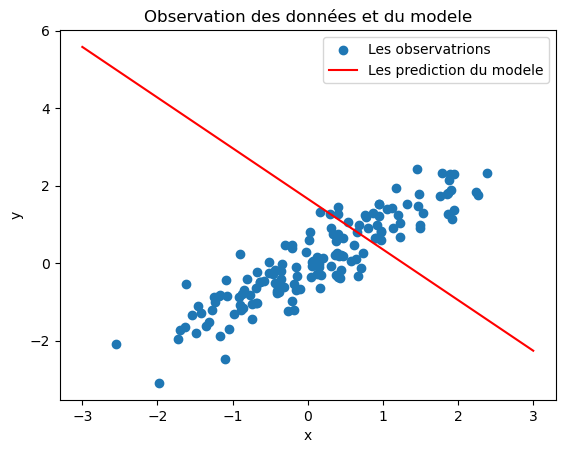

In [178]:
plt.figure()
plt.scatter(x, y, label='Les observatrions')
plt.plot(x_m, f, c='r', label='Les prediction du modele')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Observation des données et du modele")
plt.legend()
plt.show()

## Presentation du modele apres l'entrainement Avec le jeu des données

Entrainement du modele

In [191]:
theta, history = gradient_descent(X, theta, y, alpha=0.05, nbr_itterations=500)

Representation

In [194]:
f = modele(np.hstack((x_m, np.ones((50, 1)))), theta)

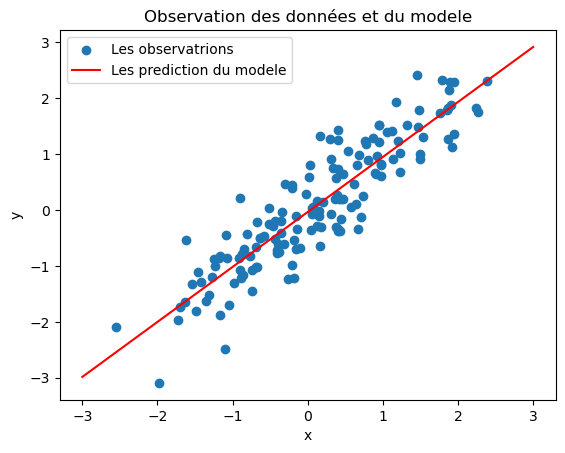

In [196]:
plt.figure()
plt.scatter(x, y, label='Les observatrions')
plt.plot(x_m, f, c='r', label='Les prediction du modele')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Observation des données et du modele")
plt.legend()
plt.show()

## Courbe d'apprentissage : Les eurreurs du modele a chaque iteration

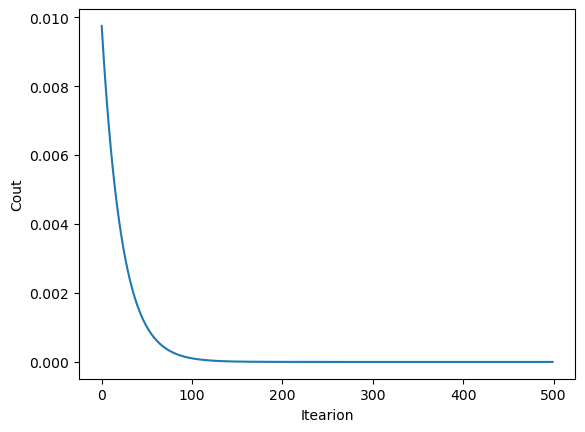

In [199]:
iterations = np.arange(0, len(history))
plt.figure()
plt.plot(iterations, history)
plt.xlabel('Itearion')
plt.ylabel('Cout')
plt.show()

D'apres la courbe d'apprentissage à partir de l'itération 200 le modele n' apprend plus car le cout ne diminue plus !!
On peut meme arreter l'apprentissage a ce niveau !!

## La precision du modele en utilisant le coefficient de determination

In [230]:
def model_precision(X, theta, y): 
    num = (y - modele(X, theta)) ** 2
    deno = (y - y.mean(axis=0))**2
    return (1 - (num.sum(axis=0) / deno.sum(axis=0)))[0]

In [236]:
print(f"La precision du modèle est de : {model_precision(X, theta, y)* 100:.2f} %")

La precision du modèle est de : 81.06 %
